Source: [link](https://github.com/Mjrovai/Python4DS/blob/master/Almost_Real_Time_Twitter_Sentiment_Analysis/almost_real_time_twitter_sentiment_analysis_EXT.ipynb)

In [104]:
import time

import re

import requests
import json

import sqlite3

import pandas as pd
import numpy as np

import tweepy

import nltk
from nltk.stem.porter import *

from wordcloud import WordCloud, STOPWORDS

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings

In [105]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [106]:
consumer_key = "4yLfbC723iTMdpVuMG4sUIbgy"
consumer_secret = "WbztNPnzgWJNRpvwSuC6ViDyXNDwtjfKsSl5d6hBhbc1FDPE1t"
access_token = "955855581360910337-NxKQ23Q033lhuemZlFGyFUb5TaoiYqr"
access_token_secret = "qlqToJDCA9KgAHvuE8AnszPKf23MowZAHUk7xs0tVeBMQ"

In [107]:
global api

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [108]:
analyser = SentimentIntensityAnalyzer()

In [109]:
analyser.polarity_scores("Our project is going to be so great!")

{'neg': 0.0, 'neu': 0.559, 'pos': 0.441, 'compound': 0.7603}

In [110]:
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=21,
        colormap='PuBu',
        max_words=50,
        max_font_size=200).generate(all_words)

    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");

In [111]:
def list_tweets(user_id, count, prt=False):
    tweets = api.user_timeline(
        "@" + user_id, count=count, tweet_mode='extended')
    tw = []
    for t in tweets:
        tw.append(t.full_text)
        if prt:
            print(t.full_text)
            print()
    return tw

In [112]:
user_id = 'realDonaldTrump' 
count=200

In [113]:
tw_trump = list_tweets(user_id, count)

In [114]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt

In [115]:
def clean_tweets(lst):
    # remove twitter Return handles (RT @xxx:)
    lst = np.vectorize(remove_pattern)(lst, "RT @[\w]*:")
    # remove twitter handles (@xxx)
    lst = np.vectorize(remove_pattern)(lst, "@[\w]*")
    # remove URL links (httpxxx)
    lst = np.vectorize(remove_pattern)(lst, "https?://[A-Za-z0-9./]*")
    # remove special characters, numbers, punctuations (except for #)
    lst = np.core.defchararray.replace(lst, "[^a-zA-Z#]", " ")

    return lst

In [116]:
tw_trump = clean_tweets(tw_trump)

In [117]:
def sentiment_analyzer_scores(text, engl=True):
    if engl:
        trans = text
    else:
        trans = translator.translate(text).text

    score = analyser.polarity_scores(trans)
    lb = score['compound']
    if lb >= 0.05:
        return 1
    elif (lb > -0.05) and (lb < 0.05):
        return 0
    else:
        return -1

In [118]:
tw_trump[0]

'....I got to know him over his many years as Chairman of the Police Athletic League, for which he devoted so much time and energy. Bob Morgenthau, a legend, will be greatly missed!'

In [119]:
sentiment_analyzer_scores(tw_trump[0])

1

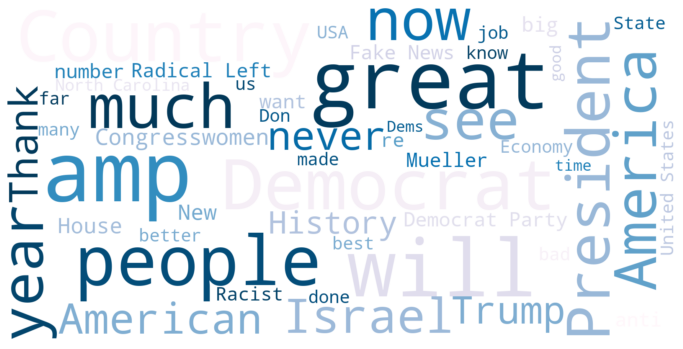

In [120]:
word_cloud(tw_trump)

In [121]:
def anl_tweets(lst, title='Tweets Sentiment', engl=True ):
    sents = []
    for tw in lst:
        try:
            st = sentiment_analyzer_scores(tw, engl)
            sents.append(st)
        except:
            sents.append(0)
    ax = sns.distplot(
        sents,
        kde=False,
        bins=3)
    ax.set(xlabel='Negative                Neutral                 Positive',
           ylabel='#Tweets',
          title="Tweets of @"+title)
    return sents

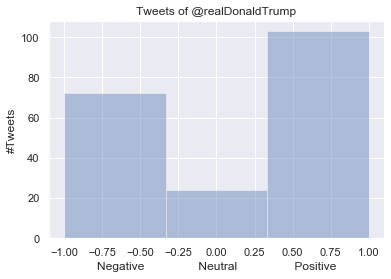

In [122]:
tw_trump_sent = anl_tweets(tw_trump, user_id)